Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix 

In [2]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
data.shape

(10337, 2)

In [4]:
data.isna().sum()

Text        0
Language    0
dtype: int64

In [5]:
data.duplicated().sum()

66

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(10271, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10271 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10271 non-null  object
 1   Language  10271 non-null  object
dtypes: object(2)
memory usage: 240.7+ KB


Visualising the Dataset

In [10]:
language = data["Language"].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


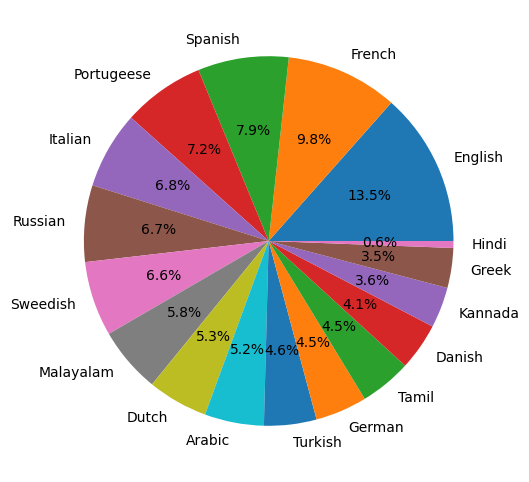

In [11]:
plt.figure(figsize=(6,6))
labels= language["index"]

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 10})
plt.show()

Cleaning of the Dataset

In [12]:
data["cleaned_Text"] = ""
data

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [13]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()                                        # converting the text to lower case
  Text = re.sub('#\S+', '', Text)                            # remove hashtags

  return Text

In [14]:
data["cleaned_Text"] = data["Text"].apply(lambda x:clean_func(x))
data

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [15]:
x = data["cleaned_Text"]
y = data["Language"]

In [16]:
lb = LabelEncoder()
y = lb.fit_transform(y)
y.shape

(10271,)

In [17]:
CV = CountVectorizer()
x = CV.fit_transform(x).toarray()
x.shape

(10271, 39404)

Splitting the dataset into train and test sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=None,test_size=0.3, random_state=42)

In [19]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
model = MultinomialNB()

In [21]:
model.fit(x_train,y_train)

MultinomialNB()

In [22]:
print("The training score is : ",model.score(x_train,y_train))

The training score is :  0.9905411044651551


In [23]:
y_predict = model.predict(x_test)

In [24]:
print("The testing score is : ",model.score(x_test,y_test))

The testing score is :  0.9782608695652174


In [25]:
acc_score = accuracy_score(y_test,y_predict)
print("Accuracy score of the model is : ",acc_score)

Accuracy score of the model is :  0.9782608695652174


In [26]:
# pickle.dump(model,open("multinomialNB.pkl","wb"))

In [27]:
def prediction(text):
  x = CV.transform([text]).toarray()                # converting text to bag of words model (Vector)
  lang = model.predict(x)                           # predicting the language
  lang = lb.inverse_transform(lang)            # finding the language corresponding to the predicted value
  print("The langauge is in",lang[0])

In [34]:
prediction( "أنا أحب زكا وفريقها الرائع")
prediction("I Love Zaka and its Nice Team")
prediction("Ich liebe Zaka und ihre nettes Team")

The langauge is in Arabic
The langauge is in English
The langauge is in German


In [29]:
# sample_text = input("Enter te")           こんにちは

In [41]:
prediction("")

The langauge is in English
